In [1]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = np.zeros((dimensions, dimensions))

    def train(self, patterns):
        for pattern in patterns:
            pattern = pattern.flatten()
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, iterations=5):
        pattern = pattern.flatten()
        for _ in range(iterations):
            for i in range(self.dimensions):
                raw_output = np.dot(self.weights[i], pattern)
                if raw_output > 0:
                    pattern[i] = 1
                else:
                    pattern[i] = -1
        return pattern.reshape((int(np.sqrt(self.dimensions)), int(np.sqrt(self.dimensions))))

# Initialisiere ein Hopfield-Netzwerk für Bilder der Größe 16x16
network = HopfieldNetwork(16*16)


In [2]:
from tensorflow.keras.datasets import mnist

# Lade das MNIST-Datensatz herunter
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisiere die Daten auf -1 bis 1
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

# Flattene die Bilder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))


2023-07-08 07:17:50.396608: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 07:17:50.430371: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 07:17:50.430804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 07:17:51.208354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Erstelle ein Hopfield-Netzwerk
network = HopfieldNetwork(28*28)

# Trainiere das Netzwerk mit den Trainingsdaten
network.train(x_train)


In [4]:
# Wähle ein zufälliges Bild aus dem Testset
input_image = np.copy(x_test[np.random.choice(len(x_test))])

# Füge Rauschen hinzu, indem du zufällig einige Pixel umdrehst
# Hierbei wird nur mit einer Wahrscheinlichkeit von 10% ein Pixel umgedreht
noise_indices = np.random.choice([True, False], size=input_image.shape, p=[0.0, 1.0])
input_image[noise_indices] = -input_image[noise_indices]

In [5]:
# Versuche, das ursprüngliche Bild zurückzurufen
output_image = network.recall(input_image)


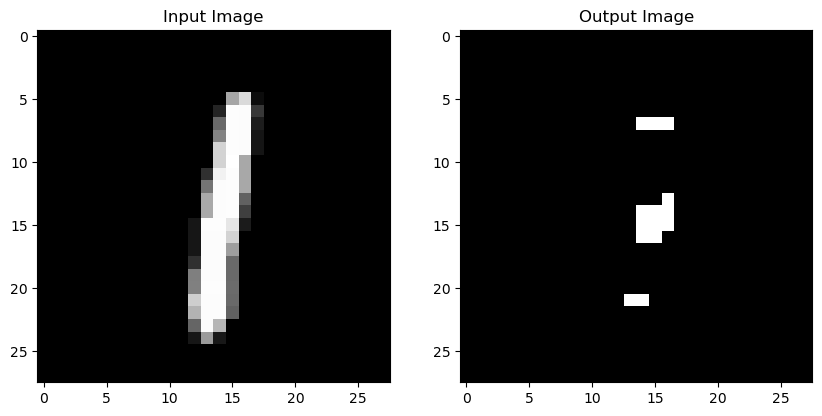

In [6]:
import matplotlib.pyplot as plt

# Umforme die Bilder in ihre ursprüngliche Form von 28x28
input_image = input_image.reshape((28, 28))
output_image = output_image.reshape((28, 28))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Output Image')
plt.imshow(output_image, cmap='gray')

plt.show()
